In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import label_binarize, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('documentary_list_with_length.csv')

In [14]:
df.head()

,video_id,video_title,upload_date,length,view_count,like_count,comment_count
0,iHrXox5SiuU,"[빼빼가족 모음] 중고버스 ‘무탈이’를 타고, 5만여 km 유라시아 대륙을 횡단했다...",2023-04-30,106,7302,152,4
1,DJJuXyM3a5Y,가족과 이웃이 고인에게 보내는 이 세상에서의 마지막 선물. 섬마을 꽃상여에 담긴 애...,2023-04-29,48,127142,1397,91
2,ek0eifJFptQ,"인간을 넘어서는 포스트 휴먼, 누구인가? [다큐ON-Docu ON] | KBS 23...",2023-04-28,9,640,13,0
3,cQ0dxQZ4ptI,"인간의 삶을 위한 로봇기술, 삶의 전반에 퍼져가다 [다큐ON-Docu ON] | ...",2023-04-28,9,373,4,0
4,8GwC4Mt3srM,인간을 이해하기 위한 로봇 제작! [다큐ON-Docu ON] | KBS 230428 방송,2023-04-28,10,294,6,0


In [19]:
# df['view_count'] = df['view_count'].astype(int)
# df['like_count'] = df['like_count'].astype(int)
# df['comment_count'] = df['comment_count'].astype(int)
# df['length'] = df['length'].astype(int)

df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce')

X = df.drop(['video_id', 'video_title', 'upload_date', 'view_count'], axis=1)

x_trains, x_tests, y_train, y_test = train_test_split(X, df['view_count'], test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_trains)
x_test = scaler.transform(x_tests)

In [38]:
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)

y_pred = linearReg.predict(x_test)

lr_score = linearReg.score(x_test, y_test)

print("Model score: ", lr_score)

Model score:  0.6585522646205859


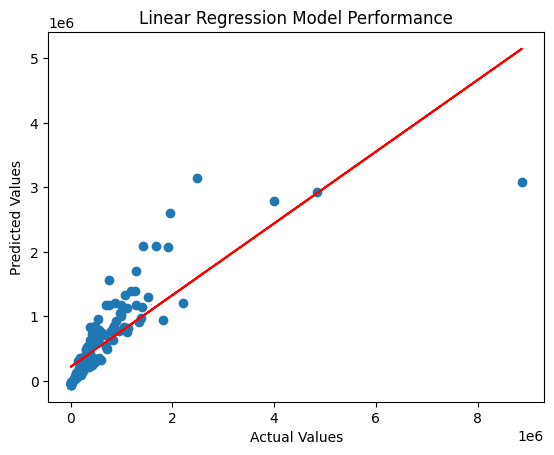

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the slope and intercept of the linear regression line
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Create the scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add the linear regression line to the plot
plt.plot(y_test, slope*y_test + intercept, color='red')

# Set the plot title and axis labels
plt.title("Linear Regression Model Performance")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Show the plot
plt.show()

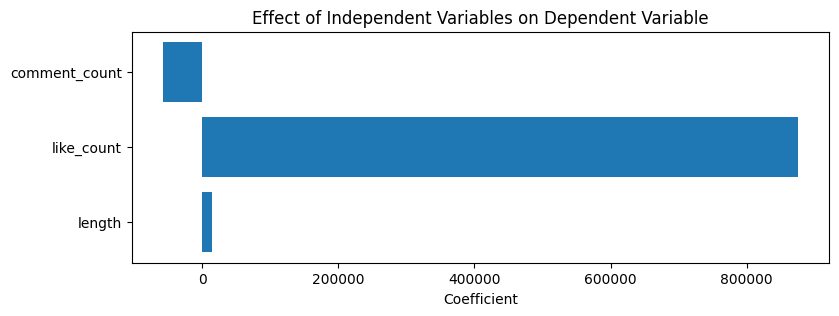

,Coefficient
length,14830.661910
like_count,874791.935834
comment_count,-56942.008940


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# get the coefficients and their corresponding variables
coefficients = pd.DataFrame(linearReg.coef_, X.columns, columns=['Coefficient'])

# visualize the coefficients
plt.figure(figsize=(9,3))
plt.barh(coefficients.index, coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Effect of Independent Variables on Dependent Variable')
plt.show()

coefficients


In [33]:
from sklearn.svm import SVR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['view_count'], test_size=0.3, random_state=42)

# Initialize the SVR model
svr = SVR(kernel='linear')

# Fit the model to the training data
svr.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svr.predict(X_test)

# Calculate the R^2 score for the predictions
svm_r2 = r2_score(y_test, y_pred)

print("R^2 score: ", svm_r2)

R^2 score:  0.6171307483449286


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['view_count'], test_size=0.3, random_state=42)

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = gbr.predict(X_test)

# Calculate the R^2 score for the predictions
gvr_r2 = r2_score(y_test, y_pred)

print("R^2 score: ", gvr_r2)

R^2 score:  0.4842431989532965


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['view_count'], test_size=0.3, random_state=42)

# Initialize the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = rf.predict(X_test)

# Calculate the R^2 score for the predictions
rf_r2 = r2_score(y_test, y_pred)

print("R^2 score: ", rf_r2)

R^2 score:  0.5098881588513577


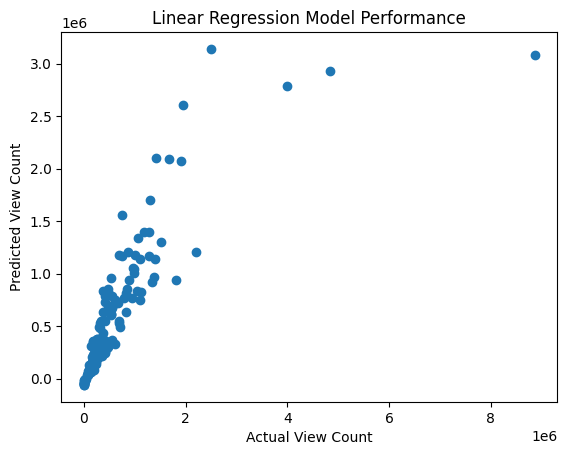

In [32]:
import matplotlib.pyplot as plt


# create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Linear Regression Model Performance')
plt.show()

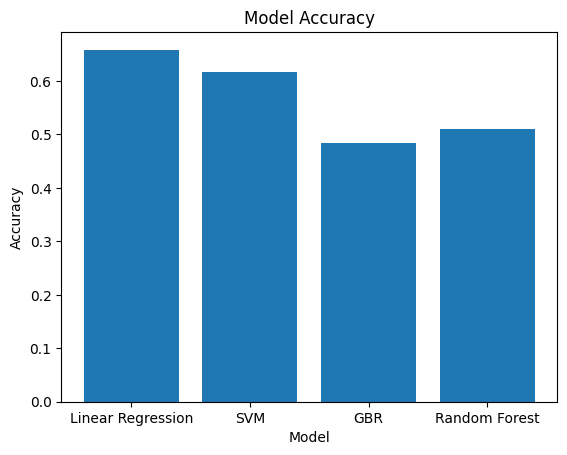

In [40]:
import matplotlib.pyplot as plt

model_scores = [lr_score, svm_r2, gvr_r2, rf_r2]
model_names = ['Linear Regression', 'SVM', 'GBR', 'Random Forest']

plt.bar(model_names, model_scores)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()